In [18]:
%load_ext autoreload
%autoreload 2

from get_data import (get_merged_table, get_bohlin78, get_shull2021)
from plot_fuse_results import plot_results2
from matplotlib import pyplot as plt
from astropy.table import Column

plt.ioff()

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get the data

### data for Gordon09 extinction curve sightlines

In [19]:
data = get_merged_table()

# add comments for certain stars here
data.add_column(Column(['no'] * len(data), dtype='<U16', name='comment'))
def set_comment(name, s):
    data['comment'][data['Name'] == name] = s

for name in ["HD200775", "HD164906", "HD045314", "HD206773"]:
    set_comment(name, "lo_h_av")

set_comment("HD096675", "hi_h_av")

# write out in fits format so we can look at it in topcat
data.write('merged_table.fits', overwrite=True)

### data for Gordon09 comparision star sightlines

In [20]:
data_comp = get_merged_table(comp=True)

### data for Bohlin 78 Copernicus sightlines

In [21]:
data_bohlin78 = get_bohlin78()
data_bohlin78

hdname,nhi,nhi_unc,nh,nh2,nhtot,nht,EBV,d,lognhi,lognhi_unc,lognhtot,fh2,RV,AV,NH_AV,NH_EBV
int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
886,1.1000000000000002e+20,2.2000000000000004e+19,0.25,0.0,1.1000000000000002e+20,0.25,0.01,145,20.041392685158225,0.08804562952784067,20.041392685158225,0.0,3.1,0.031000000000000003,3.5483870967741934e+21,1.1000000000000002e+22
2905,1.6e+21,4.8e+20,0.51,1.88e+20,1.98e+21,0.64,0.35,1009,21.204119982655925,0.13442265614629,21.296665190261532,0.1898989898989899,3.1,1.085,1.8248847926267281e+21,5.657142857142858e+21
5394,1.45e+20,2.9e+19,0.24,0.0,1.45e+20,0.24,0.08,194,20.161368002234976,0.08804562952784067,20.161368002234976,0.0,3.1,0.24800000000000003,5.8467741935483866e+20,1.8125e+21
10516,3.5e+20,7e+19,0.83,1.2e+19,3.7e+20,0.88,0.2,137,20.544068044350276,0.08804562952784067,20.568201724066995,0.06486486486486487,3.1,0.6200000000000001,5.96774193548387e+20,1.85e+21
14633,3.6e+20,1.08e+20,0.057,0.0,3.6e+20,0.057,0.1,2042,20.556302500767288,0.13442265614629,20.556302500767288,0.0,3.1,0.31000000000000005,1.161290322580645e+21,3.6e+21
21856,1.1e+21,2.2e+20,0.61,1.1e+20,1.32e+21,0.74,0.19,581,21.041392685158225,0.08804562952784067,21.12057393120585,0.16666666666666666,3.1,0.5890000000000001,2.2410865874363325e+21,6.947368421052632e+21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209975,1.3e+21,3.9e+20,0.39,1.2e+20,1.54e+21,0.46,0.38,1086,21.113943352306837,0.13442265614629,21.187520720836464,0.15584415584415584,3.1,1.1780000000000002,1.3073005093378607e+21,4.052631578947368e+21
210839,1.3e+21,2.6e+20,0.42,6e+20,2.5e+21,0.82,0.56,991,21.113943352306837,0.08804562952784067,21.397940008672037,0.48,3.1,1.7360000000000002,1.4400921658986172e+21,4.4642857142857137e+21


### Data for Shull 2021 sightlines

In [28]:
data_shull = get_shull2021()
data_shull
import numpy as np
i = np.argmax(data_shull['fh2'])
data_shull[i]

name,EBV,lognhi,lognh2,lognhtot,fh2,nhi,nh2,nhtot,NH_EBV
,mag,dex(1 / cm2),dex(1 / cm2),dex(1 / cm2),,dex(1 / cm2),dex(1 / cm2),dex(1 / cm2),dex(1 / cm2)
str13,float64,float64,float64,float64,float64,float64,float64,float64,float64
HD 154368,0.81,21.0,21.17,21.6,0.747,1e+21,1.4791083881682132e+21,3.9810717055349854e+21,4.914903340166648e+21


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

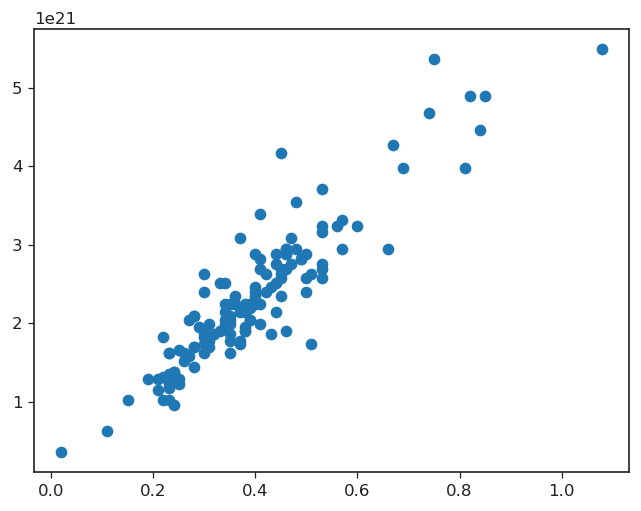

In [22]:
plt.scatter(data_shull['EBV'], data_shull['nhtot'])
plt.gcf()

# 1. Basic gas-to-dust slopes
## Gas-to-A(V)
- 4 strong outlieres in NH-AV relation. Including them breaks the fit. Effect on NH-E(B-V) is not that strong.
- Need to investigate these points, as they might also have a strong effect on the fit result of other plots.
- gas-to-A(V) narrower than gas-to-E(B-V)

In [6]:
fig1 = plot_results2(data, 'AV', 'nhtot', pxrange=[0.0,3.5], pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)
fig2 = plot_results2(data, 'AV', 'nhtot', pxrange=[0.0,3.5], pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, ignore_comments=['lo_h_av', 'hi_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 7.939552440521085e+20 1.4484475305900344
m, b: 7.939552440521085e+20 1.1500025126462848e+21
Bootstrap: m = 8.155701689743514e+20 ; b = 3.1335654842980216
Bootstrap: sm = 3.009592632284321e+20 ; sb = 13.325403128662456
Bootstrap: corr(m, b) = -0.3506093890139378


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 1.6168247092303563e+21 0.2104109043344427
m, b: 1.6168247092303563e+21 3.4019754921943165e+20
Bootstrap: m = 1.6710284333171113e+21 ; b = 0.18009932977928536
Bootstrap: sm = 1.711838269784509e+20 ; sb = 0.13483671047611603
Bootstrap: corr(m, b) = -0.9365131312194871


## Gas-to-E(B-V)


In [7]:
fig1 = plot_results2(data, 'EBV', 'nhtot', pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull)
fig2 = plot_results2(data, 'EBV', 'nhtot', pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull, ignore_comments=['lo_h_av', 'hi_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 6.574558880523592e+21 -0.03163856654887931
m, b: 6.574558880523592e+21 -2.0800961867097113e+20
Bootstrap: m = 6.584687329849562e+21 ; b = -0.0274903701779984
Bootstrap: sm = 8.916910188103179e+20 ; sb = 0.04626525370461716
Bootstrap: corr(m, b) = -0.9563264203834154


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 6.256271569683326e+21 -0.004522248162232323
m, b: 6.256271569683326e+21 -2.829241260842675e+19
Bootstrap: m = 6.262405688099472e+21 ; b = 0.0004995087034453663
Bootstrap: sm = 7.877182723053949e+20 ; sb = 0.048647483113250414
Bootstrap: corr(m, b) = -0.9513074742933889


# 2. Gas-to-dust vs other things

## VS dust column and gas column

Before making any big conlusions here, the correlation between NH / AV and AV needs to be implemented properly. Preliminarily, we have:

### Using A(V)
The bad points mentioned above seem to pull down NH/AV - AV pretty badly. Not including them makes the downward slope insignificant. 

With them included:

NH-AV goes down with AV, but up with NH! Despite the fact that AV and NH have a well-defined slope in the plots above!

In [8]:
fig1 = plot_results2(data, 'AV', 'NH_AV', pyrange=[0.0,0.5e22], pxrange=[0,4],
            data_comp=data_comp,data_bohlin=data_bohlin78)
fig2 = plot_results2(data, 'nhtot', 'NH_AV', pyrange=[0.0,0.5e22], pxrange=[0, 1.2e22],
            data_comp=data_comp,data_bohlin=data_bohlin78)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Solution
m, b_perp: -6.430885277786043e+20 4.066285958059688
m, b: -6.430885277786043e+20 2.6149818502954164e+21
Bootstrap: m = -5.980186853328956e+20 ; b = 4.618130066274865
Bootstrap: sm = 1.6845682537468068e+20 ; sb = 1.6027729455950448
Bootstrap: corr(m, b) = 0.842068182266129


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Solution
m, b_perp: -0.883027414356356 2.7802512971024297e+21
m, b: -0.883027414356356 3.709044272710429e+21
Bootstrap: m = 21424.49720770099 ; b = 1.746444114543296e+21
Bootstrap: sm = 80192.15043445416 ; sb = 1.6811707995549034e+21
Bootstrap: corr(m, b) = -0.612030633903515


### Using E(B-V)

In this case, the slope of NH / EBV is unclear, but NH / EBV does sem to go up with EBV!

In [23]:
fig1 = plot_results2(data, 'EBV', 'NH_EBV', pyrange=[0.0,1.5e22], pxrange=[-.1,1],
            data_comp=data_comp,data_bohlin=data_bohlin78, data_shull=data_shull)
fig2 = plot_results2(data, 'nhtot', 'NH_EBV', pyrange=[0.0,1.5e22], pxrange=[0,1.2e22],
            data_comp=data_comp,data_bohlin=data_bohlin78, data_shull=data_shull)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Solution
m, b_perp: 3.046182440591353e+21 1.3852939357594147
m, b: 3.046182440591353e+21 4.219858062168015e+21
Bootstrap: m = 2.752149156387848e+21 ; b = 3.5977896215286616
Bootstrap: sm = 2.595860383691017e+21 ; sb = 6.3778342266473835
Bootstrap: corr(m, b) = -0.4201595865885977


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Solution
m, b_perp: 0.42396286385548004 4.062289388871619e+21
m, b: 0.42396286385548004 4.412298045933434e+21
Bootstrap: m = 0.4926502467525827 ; b = 3.981634981325153e+21
Bootstrap: sm = 0.48850470866118817 ; sb = 1.0988038467053173e+21
Bootstrap: corr(m, b) = -0.9177919279229121


## VS average grain size (RV)

In [10]:
_ = plot_results2(data, 'RV', 'NH_AV', pxrange=[2.5,6.0], pyrange=[0.0,0.5e22],
            data_comp=data_comp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Solution
m, b_perp: -1.3263289290806843e+21 4.616167922622815
m, b: -1.3263289290806843e+21 6.122557057268926e+21
Bootstrap: m = -2.304288256890873e+25 ; b = 4.583576190168204
Bootstrap: sm = 2.292581383468506e+26 ; sb = 0.5012611239611904
Bootstrap: corr(m, b) = 0.31975775367875525


## VS molecular fraction (fH2)
### Using A(V)

In [11]:
_ = plot_results2(data, 'fh2', 'NH_AV', pxrange=[0.0,0.7], pyrange=[0.0,0.5e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Solution
m, b_perp: -1.3623060729474968e+21 1.4661737959659285
m, b: -1.3623060729474968e+21 1.9973774662408685e+21
Bootstrap: m = -9.332022637152025e+20 ; b = 5.603376788908673
Bootstrap: sm = 1.252939960354417e+21 ; sb = 30.384720111561684
Bootstrap: corr(m, b) = 0.10498787651170949


### Using E(B-V)

In [25]:
_ = plot_results2(data, 'fh2', 'NH_EBV', pxrange=[0.0,0.7], pyrange=[0.0,1.5e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Solution
m, b_perp: -2.6973244186064176e+21 2.352617070891178
m, b: -2.6973244186064176e+21 6.345771472945081e+21
Bootstrap: m = -2.5939499003972886e+21 ; b = 3.7429520745254683
Bootstrap: sm = 1.4279060624092168e+21 ; sb = 4.105198192568559
Bootstrap: corr(m, b) = 0.5927722235191364


# 3. Molecular fraction vs others 

E(B-V) seems a better predictor of fh2 than A(V)

## VS E(B-V) dust column

In [29]:
_ = plot_results2(data, 'EBV', 'fh2',
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 0.8261948029503943 -0.09831842798596063
m, b: 0.8261948029503943 -0.1275337386266183
Bootstrap: m = 0.8472991100317542 ; b = -0.10176132306458717
Bootstrap: sm = 0.1311787526412356 ; sb = 0.031136484686225287
Bootstrap: corr(m, b) = -0.9453566964214722


## VS A(V) dust column

In [30]:
_ = plot_results2(data, 'AV', 'fh2', data_comp=data_comp, data_bohlin=data_bohlin78)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 0.17648593902273363 -0.09489698916453
m, b: 0.17648593902273363 -0.09636354875522762
Bootstrap: m = 0.1503877589728589 ; b = -0.06620988607252883
Bootstrap: sm = 0.0799300050473388 ; sb = 0.07415568509261722
Bootstrap: corr(m, b) = -0.9662737612369706


## VS average grain size (RV)

In [15]:
_ = plot_results2(data, 'RV', 'fh2', pxrange=[2.0,6.0], data_comp=data_comp, ignore_comments=['lo_h_av', 'hi_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: -0.3108279462092266 1.1721327402835853
m, b: -0.3108279462092266 1.2274496668295722
Bootstrap: m = 283.760409716585 ; b = 1.0823027804619083
Bootstrap: sm = 2826.3767401778514 ; sb = 0.5423699264979033
Bootstrap: corr(m, b) = -0.7595202366114627


# 4. Basic extinction relations

In [16]:
_ = plot_results2(data, 'EBV', 'RV')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: -0.8609083812877215 2.73747255331241
m, b: -0.8609083812877215 3.612181120794964
Bootstrap: m = -1.0288972697971288 ; b = 2.533462314048201
Bootstrap: sm = 1.1213834626986439 ; sb = 0.5463620595145419
Bootstrap: corr(m, b) = 0.7957784584760382


In [17]:
_ = plot_results2(data, 'AV', 'RV')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 0.240309989775073 2.6693975017784384
m, b: 0.240309989775073 2.7453931077335967
Bootstrap: m = 0.24326863362248918 ; b = 2.663142445199492
Bootstrap: sm = 0.11886814175741989 ; sb = 0.2352696839026726
Bootstrap: corr(m, b) = -0.9781003477976151


# Other ideas

longitude versus rv and distance versus rv (and versus fh2)

COS FUV needs 2x10-13 ergs/blah blah

E140H for CO (maybe E140M), S/N 15...

E(B-V)/distance versus fH2.  Should also do A(V)/d.  Maybe n(H) as well.